# Introduction to Brightway2

```{admonition} Authors
:class: hint
This chapter was created by [Karin Treyer](https://www.psi.ch/en/ta/people/karin-treyer) in 2024. It was edited for publication by [Michael Weinold](https://github.com/michaelweinold) with the help of [Maria Höller](https://www.linkedin.com/in/maria-hoeller/) and [Mehdi Iguider](https://www.linkedin.com/in/mehdi-iguider/) as part of the [Brightcon 2024 Documentation Hackathon](https://2024.brightcon.link).
```

```{admonition} License
:class: seealso
This page is licensed under a [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).
```

```{admonition} How to use this Tutorial...
:class: note
There are two ways to use this tutorial:

1. You could read it online on this website and copy/paste some snippets of code into a Jupyter Notebook to play around.
2. If you click on the download button in the top right corner, you can download this section as a Jupyter Notebook (`.ipynb`).
```

## 1. Installing Activity Browser

The Activity Browser ("AB") is a tool that allows you to perform Brightway life-cycle assessment calculations using a visual interface. To install AB on your computer, you can follow [the setup instructions here](https://github.com/LCA-ActivityBrowser/activity-browser). There are different ways how you can install AB. You will already understand the "quick way" installation by now, which is shown here:

1. Create a Conda environment named `ab` with the following command:

```bash
conda create -n ab -c conda-forge --solver libmamba activity-browser
```

2. Activate the environment:

```bash
conda activate ab
```

3. Start the Activity Browser:

```bash
activity-browser
```

Activity Browser "sees" all the Brightway projects you have on your computer, and adopts all new projects you create and all new databases as you are working on. This means that you can make edits to a Brightway project using the command line and these changes will be reflected in the Activity Browser interface.

## 2. Create an Environment Brightway

You should create a separate environment for your Brightway installation. To install Brightway on your computer, you can follow [the setup instruction here](https://docs.brightway.dev/en/legacy/content/installation/installation.html):

1. Create a Conda environment named `bw` with the following command:

```bash
conda create -n bw brightway2=2.4.7 jupyterlab
```

Note that here we have installed both Brightway _and_ the `jupyterlab` package, which is required to work with Jupyter Notebooks.

2. Activate the environment:

```bash
conda activate bw
```

3. Start Jupyter Lab so that you can work on a notebook:

```bash
jupyter lab
```

Now that you have understood how to get the Brightway packages on your computer and you want to do what your heart longs for: LCA 💚

## 3. Example Project

We investigate Hydrogen production via water electrolysis technologies. It's good practice to describe your project shortly, and which data you are using:

**Origin of LCI data:**

* ecoinvent v3.9.1 cut-off system
* literature data
* original data from company X  (confidential)

**Goal of the study:**

- Import the biosphere, LCIA methods 
- Import the background database ecoinvent
- Import the foreground inventories (you can look at all these databases in AB in a human friendly way)
- Calculate the LCIA results, create an easy plot, but additionally output them an Excel file so that you can visualise it there, if you are not used to visualisation with Python.

### 3.1 Notebook Preparations

First, we must import the required Brightway packages and set up the project:

In [1]:
import bw2io as bi
import bw2data as bd
import bw2calc as bc

Often, we need to use other helpful Python packages. For each of these, very helpful CheatSheets exist on the web! In our example, the Pandas library for working with tabulated data will be sufficient.

In [3]:
import pandas as pd

### 3.2 Setting up Projects

```{admonition} License
:class: note
You can do the next steps in ActivityBrowser if you prefer. It's possible to create, rename, and delete projects there.
```

```{admonition} License
:class: seealso
[Section "Projects" in the Brightway Documentation Cheat Sheet](https://docs.brightway.dev/en/latest/content/cheatsheet/projects.html)
```

You can check which projects exist on my computer - to see which ones are there, or if you have forgotten the name of your project. Of course, on your computer, you will see a different list of projects:


In [4]:
list(bd.projects) #the prefix "bw" indicates that "projects" is a method of the bw2data package

[Project: default,
 Project: ei_3.10,
 Project: debug,
 Project: banana,
 Project: ddd,
 Project: USEEIO-1.1,
 Project: bw_panel,
 Project: learn_brightway_bw2]

Let's create a project (or activate it when you come back to work on your project):

In [5]:
bd.projects.set_current('learn_brightway_bw2') # activates a project, or creates it first if it doesn't exist yet

### 3.3 Filling your project with the Biosphere, LCIA Methods, and Ecoinvent

```{admonition} License
:class: note
You can do the next steps in ActivityBrowser if you prefer. It's possible to import biosphere, LCIA methods, and ecoinvent (and other databases) there.
```

```{admonition} License
:class: seealso
[Section "Databases" in the Brightway Documentation Cheat Sheet](https://docs.brightway.dev/en/latest/content/cheatsheet/databases.html)
```

You only have to import the databases once. After that, they will be present in your project.

In [ ]:
list(bd.databases) # check if there are databases in the project, and how they are named. 

Ok, nothing is there yet. There are now two ways to import the necessary Ecoinvent database. You can choose either option A or option B, but you don't have to execute both!

#### Option A

This option imports the biosphere, LCIA methods, and ecoinvent all in one go!

```{admonition} Change Placeholder Text!
:class: note
Below, change the placeholder text `JohnDoe` to your own Ecoinvent username and the password `1234` to your own Ecoinvent password.
```

In [6]:
if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('ecoinvent 3.9.1 is already present in the project')
else:
    bi.import_ecoinvent_release(
        version='3.9.1',
        system_model='cutoff', # can be cutoff / apos / consequential / EN15804
        username='JohnDoe',
        password='1234'
    )

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
4718 datasets
0 exchanges
0 unlinked exchanges
  
Title: Writing activities to SQLite3 database:
  Started: 09/24/2024 10:10:17
  Finished: 09/24/2024 10:10:17
  Total time elapsed: 00:00:00
  CPU %: 99.30
  Memory %: 1.64
Created database: ecoinvent-3.9.1-biosphere
Extracting XML data from 21238 datasets
Extracted 21238 datasets in 18.87 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_e

Let's check if the databases are now there...


In [7]:
list(bd.databases)

['ecoinvent-3.9.1-biosphere', 'ecoinvent-3.9.1-cutoff']

#### Option B

In most older notebooks you will find on the web, you will still see the _old_ way of importing all these. There, we first import the biosphere and LCIA methods:

In [102]:
bd.bw2setup() # this creates the database "biosphere3"

Biosphere database already present!!! No setup is needed


Only now, we import the Ecoinvent data. First, download the Ecoinvent data from the [Ecoinvent website](https://ecoquery.ecoinvent.org/3.10/cutoff/files) and unzip the file. Then, provide the path to the unzipped folder `datasets` in the code below:

In [8]:
if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('ecoinvent 3.9.1 is already present in the project')
else:
    ei = bi.SingleOutputEcospold2Importer(dirpath=r'C:\Users\johndoe\Downloads\ecoinvent\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets', db_name='ev391cutoff') #recommendation for consistent databases naming: database name (ecoinvent), version number, system model
    ei.apply_strategies() #fixing some issues when ecoinvent and brightway have to talk together by going through all datasets and manipulating them in a specific way
    ei.statistics() #checking if everything worked out with strategies and linking
    ei.write_database() #save the database to our hard drive

ecoinvent 3.9.1 is already present in the project


You may want to switch to AB now to look at the databases you have just imported. In case they are not yet displayed in your project, switch to another project and switch back for the new database(s) to appear

### 3.4 Importing your own Data

```{admonition} See Also
:class: seealso
[Section "Databases" in the Brightway Documentation Cheat Sheet](https://docs.brightway.dev/en/latest/content/cheatsheet/databases.html)
```

```{admonition} File Download
:class: note
You can download the example files required for this section here: \
{download}`lci_hydrogen_electrolysis.xlsx <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW2/_data/lci_hydrogen_electrolysis.xlsx>` \
{download}`lci_rawdata_import.xlsx <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW2/_data/lci_rawdata_import.xlsx>`
```

In [12]:
imp = bi.ExcelImporter(r'C:\Users\johndoe\Downloads\lci_hydrogen_electrolysis.xlsx') # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.10 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 2.70 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
17 datasets
343 exchanges
0 unlinked exchanges
  
Wrote matching file to:
/Users/michae

This should have worked smoothly. Again, you can also look at this database in the AB.

HOWEVER, importing from Excel won't always be so easy! This is demonstrated here:

In [21]:
imp = bi.ExcelImporter(r'/Users/michaelweinold/github/brightway-book/content/chapters/BW2/_data/lci_rawdata_import.xlsx')
imp.apply_strategies()
imp.match_database("ecoinvent-3.9.1-cutoff", fields=('name','unit','location', 'reference product'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel() #(only_unlinked=True)
list(imp.unlinked)

imp.write_database()

Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 2.77 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
2 datasets
42 exchanges
3 unlinked exchanges
  Type biosphere: 1 unique unlinked exchan

InvalidExchange: 

As you can see, there are some unlinked flows. This means that no corresponding dataset for an exchange listed in the spreadsheet could be found. Usually, this is because of types, wrong type, wrong unit, etc.

To fix this, open the excel file with the unlinked flows. It will show you the lines where a problem has occurred. 
Did you find the errors?

In the first activity, I misspelled "granulate" in the reference product.
In the second case, I put "biosphere" as type instead of "technosphere".
And in the third case, I am using a location for which no market for deionised water exists. It should be CH, not AT.

In case you do not want to fix the file yourself, here is the corrected version:

```{admonition} File Download
:class: note
You can download the CORRECTED example file  here: \
{download}`lci_rawdata_import_corrected.xlsx <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW2/_data/lci_rawdata_import_corrected.xlsx>`
```

In [24]:
list(bd.databases)

['ecoinvent-3.9.1-biosphere',
 'ecoinvent-3.9.1-cutoff',
 'h2_electrolysis',
 'hydrogen_demo']

### 3.5 Looking at the Databases

```{admonition} License
:class: note
This is more "human friendly" in AB! For quick overviews, searches etc., AB is more convenient than the Jupyter Notebook.
```
```{admonition} See also...
:class: seealso
[Section "Databases" in the Brightway Documentation Cheat Sheet](https://docs.brightway.dev/en/latest/content/cheatsheet/databases.html)
```

First, we choose the activities we want to analyse later in the LCA. Here, I want to compare hydrogen production with different electrolysers.

In [9]:
h2elec =  bd.Database('h2_electrolysis')

In [10]:
h2prod = [a for a in h2elec if 'hydrogen production, gaseous' in a ['name']]
h2prod

['hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity' (kilogram, RER, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity' (kilogram, CH, None)]

We can look at one of these activities here. 
But you might prefer to do that in AB.

In [11]:
list(h2prod[0].technosphere())

[Exchange: 9.391435011269722e-07 unit 'electrolyzer production, 1MWe, AEC, Stack' (unit, RER, None) to 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: 2.3478587528174306e-07 unit 'electrolyzer production, 1MWe, AEC, Balance of Plant' (unit, RER, None) to 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: -9.391435011269722e-07 unit 'treatment of fuel cell stack, 1MWe, AEC' (unit, RER, None) to 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: -2.3478587528174306e-07 unit 'treatment of fuel cell balance of plant, 1MWe, AEC' (unit, RER, None) to 'hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None)>,
 Exchange: 51.8 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, CH, None) to 'hydrogen production, gaseous, 20 bar

We also need to choose LCIA methods. Here, I only chose to compare the different IPCC GWP time horizons to make it simple

In [13]:
bd.methods # if you don't know the names of the different LCIA methods, you can check all methods in AB, or get a list of all of them here.

Methods dictionary with 762 objects, including:
	('CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)')
	('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
	('CML v4.8 2016', 'ecotoxicity: freshwater', 'freshwater aquatic ecotoxicity (FAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: marine', 'marine aquatic ecotoxicity (MAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity (TETP inf)')
	('CML v4.8 2016', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
	('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)')
	('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')
	('CML v4.8 2016', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')
	('CML v4.8 2016', 'ozone depletion', 'ozone layer depletion (ODP steady state)')
Use `list(this object)` to get the complete list.

In [14]:
ipcc = [m for m in bd.methods if 'IPCC' in str(m) and '2021' in str(m) and 'GWP' in str(m) and 'LT' not in str(m) and 'fossil' not in str(m) and 'biogenic' not in str(m) and 'land use' not in str(m) and 'SLCFs' not in str(m)]
ipcc

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP20)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP500)')]

### 3.6 Performing an LCA

```{admonition} See also...
:class: seealso
[Section "LCA" in the Brightway Documentation Cheat Sheet](https://docs.brightway.dev/en/latest/content/cheatsheet/lca.html)
```

In [15]:
FU = [{x:1} for x in h2prod] # defining the functional units: we want "1" of the activities which produce hydrogen.

In [16]:
bd.calculation_setups['GWPs_electrolysis'] = {'inv':FU, 'ia': ipcc}
mylca = bc.MultiLCA('GWPs_electrolysis')
mylca.results

array([[ 2.37768162,  2.92877936,  2.12446524],
       [19.44666019, 21.77269211, 18.49650242],
       [ 1.80959294,  2.23680139,  1.61681642],
       [ 3.44325776,  4.1221398 ,  3.15629171]])

That's nice, but not very human friendly. Let's look at a snippet of these results.

In [33]:
{k:v for k,v in zip(ipcc, mylca.results[0])}

{('IPCC 2021',
  'climate change',
  'global warming potential (GWP100)'): 19.44666019329231,
 ('IPCC 2021',
  'climate change',
  'global warming potential (GWP20)'): 21.772692106938454,
 ('IPCC 2021',
  'climate change',
  'global warming potential (GWP500)'): 18.496502417248085}

Better, but still not so convenient. We are using pandas to show the results in a way which is better defined.

In [19]:
mylcadf = pd.DataFrame(index = ipcc, columns = [(x['name'], x['location']) for y in FU for x in y], data=mylca.results.T)
mylcadf

,"(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",2.377682,19.446660,1.809593,3.443258
"(IPCC 2021, climate change, global warming potential (GWP20))",2.928779,21.772692,2.236801,4.122140
"(IPCC 2021, climate change, global warming potential (GWP500))",2.124465,18.496502,1.616816,3.156292


In [20]:
mylcadf.to_excel('lcia_results.xlsx') # export to excel, e.g. for creating figures

### 3.7 Plotting Results

You can any Python plotting library, like [seaborn](https://seaborn.pydata.org) or [matplotlib](https://matplotlib.org) for plotting. If you already have your data stored in a Pandas DataFrame, you can plot it directly with Pandas.

In [21]:
mylcadf # we are using the mylcadf dataframe created further above.

,"(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",2.377682,19.446660,1.809593,3.443258
"(IPCC 2021, climate change, global warming potential (GWP20))",2.928779,21.772692,2.236801,4.122140
"(IPCC 2021, climate change, global warming potential (GWP500))",2.124465,18.496502,1.616816,3.156292


In [22]:
print(mylcadf.columns.tolist())

[('hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity', 'CH'), ('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', 'RER'), ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity', 'CH'), ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity', 'CH')]


We can now look at the long names of the impact assessment methods:

In [23]:
ipcc

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP20)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP500)')]

...and come up with shorter, more "human-friendly" descriptions:

In [39]:
labels_methods = {
    ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'): "IPCC GWP100", 
    ('IPCC 2021', 'climate change', 'global warming potential (GWP20)'): 'IPCC GWP20',
    ('IPCC 2021', 'climate change', 'global warming potential (GWP500)'): 'IPCC GWP500',  
}

Similarly, we can look at the long names of the activities:

In [40]:
h2prod

['hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity' (kilogram, RER, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity' (kilogram, CH, None),
 'hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity' (kilogram, CH, None)]

...and come up with shorter, more "human-friendly" descriptions:

In [41]:
labels_act = {
    ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity', 'CH'): "SOEC_with_steam",
    ('hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity', 'CH'): "AEC", 
    ('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', 'RER'): "PEM",
    ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity', 'CH'): "SOEC"
}

Now, we can update the labels in the dataframe:

In [42]:
mylcadf

,"(hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity, RER)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity, CH)","(hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity, CH)"
"(IPCC 2021, climate change, global warming potential (GWP100))",2.377682,19.446660,1.809593,3.443258
"(IPCC 2021, climate change, global warming potential (GWP20))",2.928779,21.772692,2.236801,4.122140
"(IPCC 2021, climate change, global warming potential (GWP500))",2.124465,18.496502,1.616816,3.156292


In [43]:
df = mylcadf.rename(columns=labels_act, index=labels_methods)
df

,AEC,PEM,SOEC_with_steam,SOEC
IPCC GWP100,2.377682,19.446660,1.809593,3.443258
IPCC GWP20,2.928779,21.772692,2.236801,4.122140
IPCC GWP500,2.124465,18.496502,1.616816,3.156292


Now can we plot the dataframe. Here, we are using [the plotting functionality of Pandas itself](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html):

<Axes: xlabel='Impact category', ylabel='Impact score'>

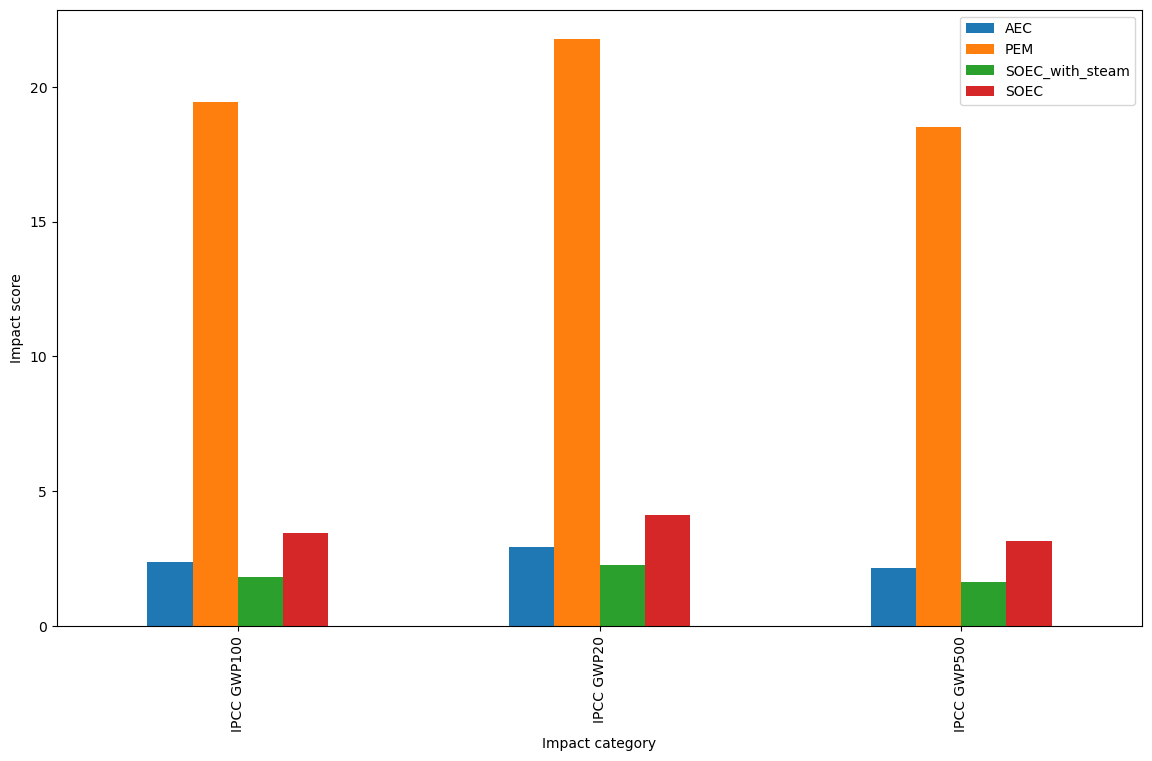

In [44]:
df.plot.bar(
    xlabel='Impact category',
    ylabel='Impact score',
    figsize=(14,8)
)

We can also normalise our data:

In [45]:
df_norm = (df.T / df.abs().max(axis=1)).T

...and plot it again:

<Axes: xlabel='Impact category', ylabel='Impact score'>

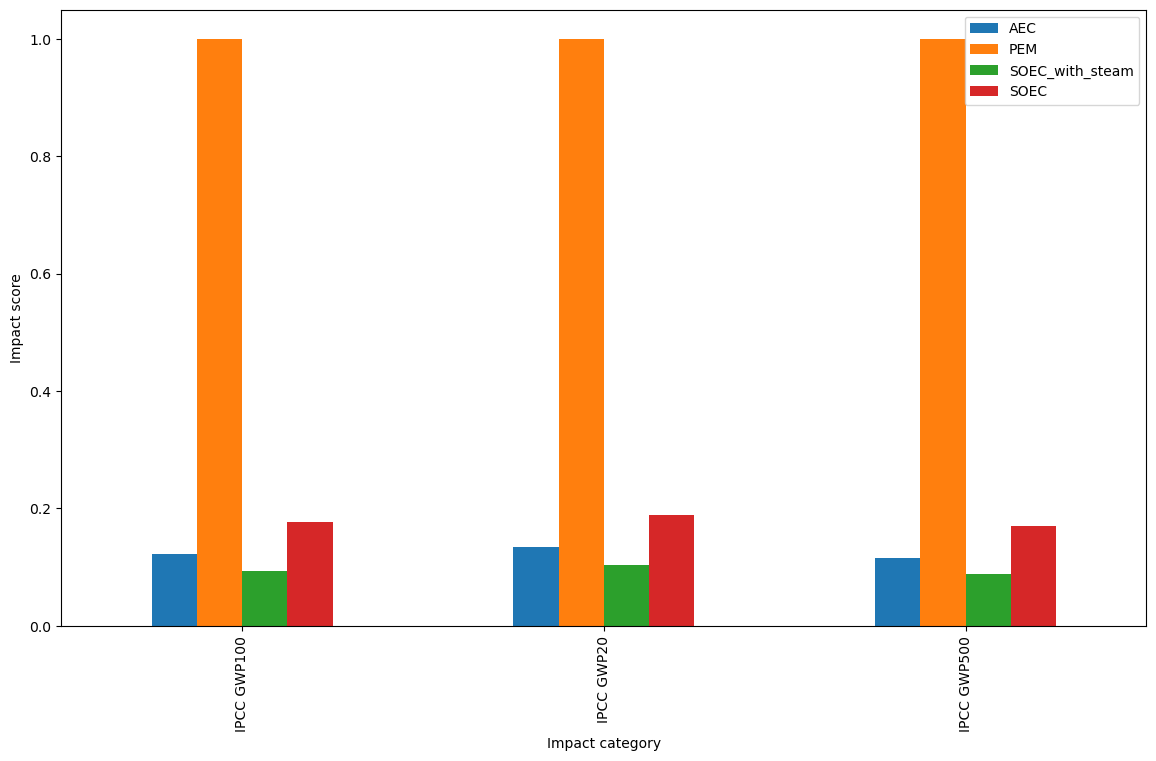

In [46]:
df_norm.plot.bar(
    xlabel='Impact category',
    ylabel='Impact score',
    figsize=(14,8)
)

As you can see, the y-axis only goes up to 1.0. This is because we normalised the data.